## Implementation of CNN from scratch

<img src='cnn.png'>

Firstly I decide to define how to work CNN

<img src='cnn_scratch.png'>

## Read data

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
train, test = mnist.load_data()

In [3]:
X_test, y_test = test
X_train, y_train = train

In [4]:
X_train[0].shape

(28, 28)

image shape:  (28, 28)


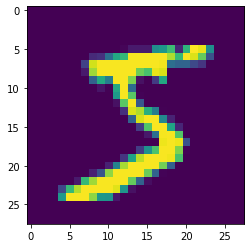

In [36]:
img = X_train[0]
print('image shape: ',img.shape)
plt.imshow(img)
plt.show()

## CNN

In [52]:
class conv2d:
    
    def __init__(self, num_filters, filter_size):
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.filter = np.random.randn(num_filters, filter_size, filter_size) / (filter_size * filter_size) 
    
    def img_region(self, image):
        h, w = image.shape
        self.image = image
        for i in range(h - self.filter_size + 1):
            for j in range(w - self.filter_size + 1):
                image_reg = image[i : i + self.filter_size, j : j + self.filter_size]
                yield image_reg, i, j
    
    def forward_propagation(self, image):
        h, w = image.shape
        output = np.zeros((h - self.filter_size + 1, w - self.filter_size + 1, self.num_filters))
        for image_reg, i, j in self.img_region(img):
            output[i, j] = np.sum(image_reg * self.filter, axis=(1, 2))
        return output
    
    def backward_propagation(self):
        pass

In [49]:
conv = conv2d(3, 3)
out = conv.forward_propagation(img)
out.shape

(26, 26, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


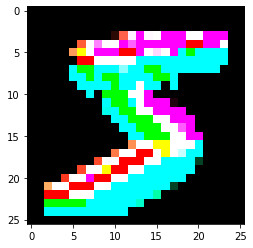

In [50]:
plt.imshow(out)
plt.show()

In [68]:
class Max_Pool:
    
    def __init__(self, filter_size):
        self.filter_size = filter_size
    
    def img_region(self, image):
        n_h = image.shape[0] // self.filter_size
        n_w = image.shape[1] // self.filter_size
        self.image = image
        
        for i in range(n_h):
            for j in range(n_w):
                image_reg = image[(i * self.filter_size) : (i * self.filter_size + self.filter_size), (j * self.filter_size): (j * self.filter_size + self.filter_size)]
                yield image_reg, i, j

    def forward_propagation(self, image):
        h, w, num_filters = image.shape
        output = np.zeros((h // self.filter_size, w // self.filter_size, num_filters))
        for image_reg, i, j in self.img_region(image):
            output[i, j] = np.amax(image_reg, axis = (0, 1))
        return output
        
    def backward_propagation(self):
        pass

In [69]:
pooling = Max_Pool(4)
output = pooling.forward_propagation(out)
output.shape

(6, 6, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


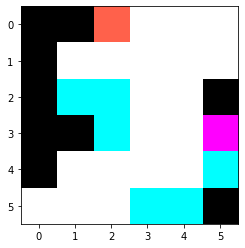

In [70]:
plt.imshow(output)
plt.show()

In [ ]:
plt.imshow(out)
plt.show()